# Mini Project 4

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

In the lectures we explored how to delta hedge sold call options, resulting in a trading strategy whose profits are neutral to upward or downward drift in a stock path movements, provided the volatility, or $\sigma$, of the stock remained constant.

For this final mini project explore the impact of a non-constant $\sigma$ on the distribution of profits of hedging. You are also encouraged to explore/research a $\sigma$-hedging strategy and write code that simulates the profit distribution of the $\sigma$-hedging strategy. 

Below is some code you can customize that simulates a stock path whose $\sigma$ is not constant.

You are encouraged to use a different model for sigma then the one provided. You can use stock paths simulated by Heston model? You could use a GARCH model for volatility. The choice is yours and you can do your own research to choose how to model a stock movement. 

In [1]:
#Package Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import norm
%run Function-Mini-Project-4.py

# The custom model

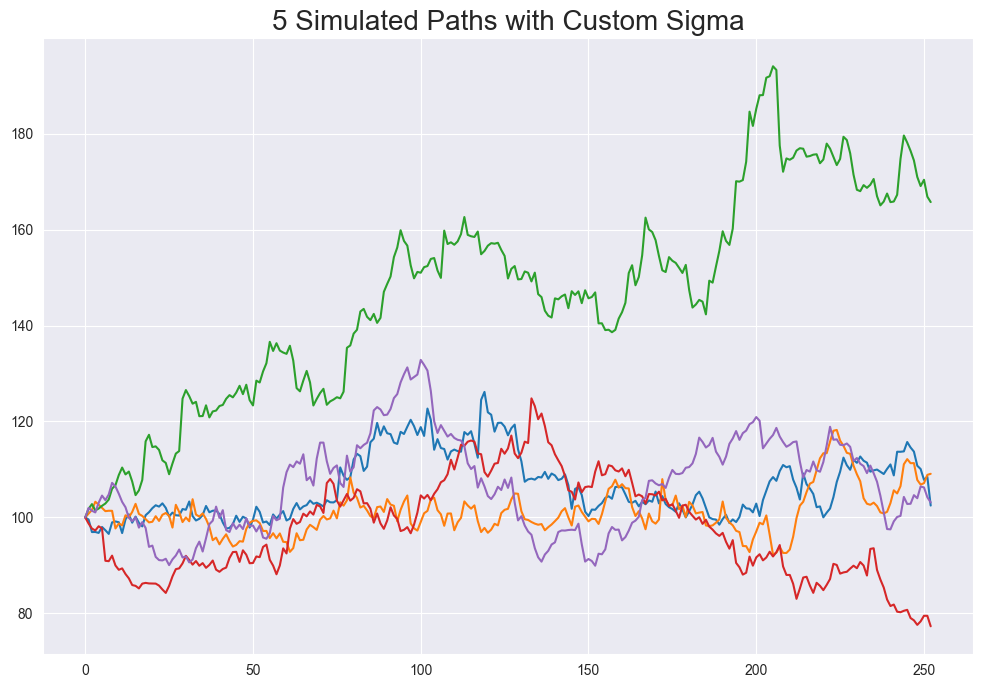

In [11]:
# 5 Simulated paths of daily steps over 1-year period and plot

S0 = 100
t = 1
r = 0.03
mu = 0
n_paths = 5
n_steps = 252


simulated_paths = stock_path_custom_sigma(S0, t, r, mu, n_paths, n_steps)


plt.figure(figsize = (12,8))

for path in simulated_paths:
    plt.plot(path)
    
plt.title(f'{n_paths} Simulated Paths with Custom Sigma', size = 20)


plt.show()

## Option pricing in the custom model

### Without Delta Hedging

In [3]:
S0 = 100
K = 100
t = 1
r = 0.03
mu = 0
n_paths = 100000
n_steps = 252

In [4]:
# Get stock paths
stock_paths = stock_path_custom_sigma(S0, t, r, mu, n_paths, n_steps)

# Final stock prices
S_T = stock_paths[:, -1]

# Call option payoff per contract
payoffs = np.maximum(S_T - K, 0)

# Discounted expected payoff per contract
option_price = np.exp(-r * t) * np.mean(payoffs)

# Standard error on option_price
std_error = np.exp(-r * t) * np.std(payoffs) / np.sqrt(n_paths)

In [5]:
print(f"European Call Option Price on stock_path_custom_sigma underlying : {option_price:.2f}")
print(f"Standard Error on Call Price : {std_error:.4f}")

European Call Option Price on stock_path_custom_sigma underlying : 13.12
Standard Error on Call Price : 0.0682


### With Delta Hedging

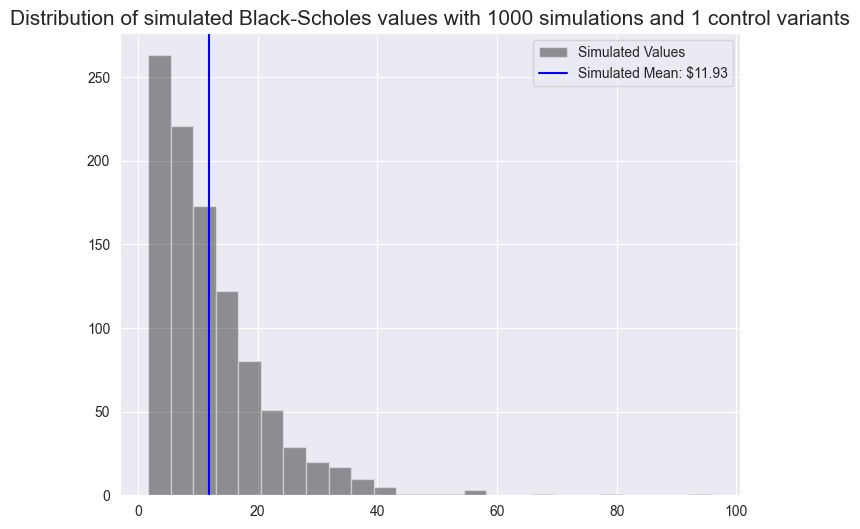

European Call Option Price (Monte Carlo, custom sigma, per contract): 11.93
Standard Error on Call Price (per contract): 0.3010


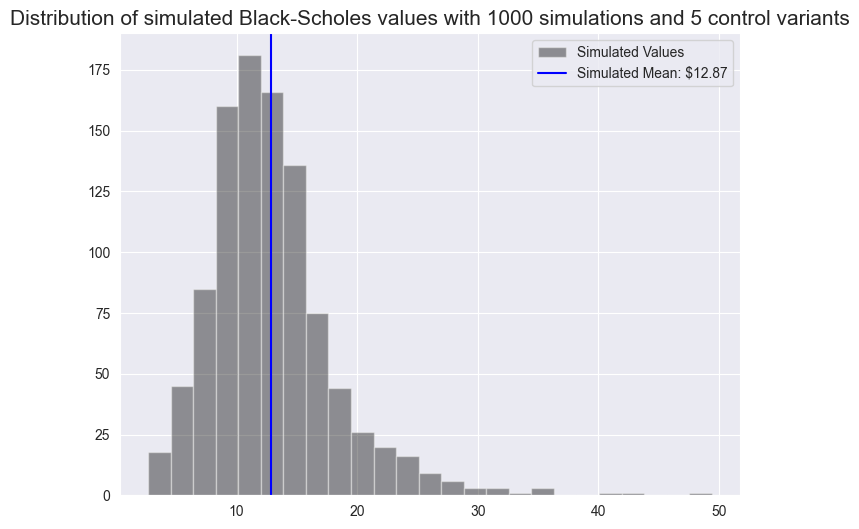

European Call Option Price (Monte Carlo, custom sigma, per contract): 12.87
Standard Error on Call Price (per contract): 0.1650


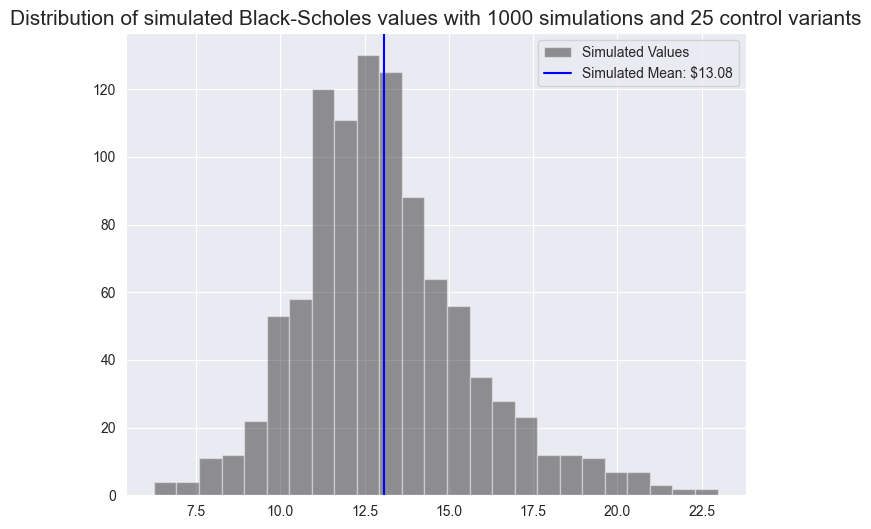

European Call Option Price (Monte Carlo, custom sigma, per contract): 13.08
Standard Error on Call Price (per contract): 0.0803


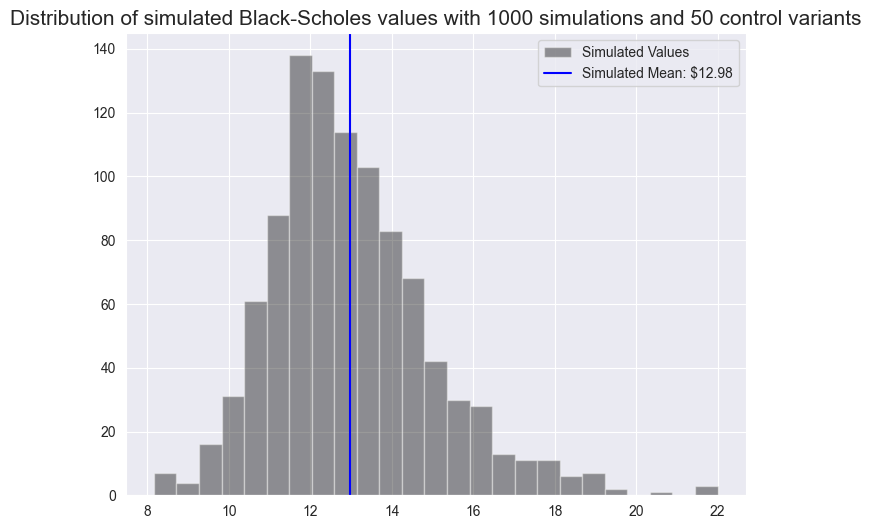

European Call Option Price (Monte Carlo, custom sigma, per contract): 12.98
Standard Error on Call Price (per contract): 0.0624


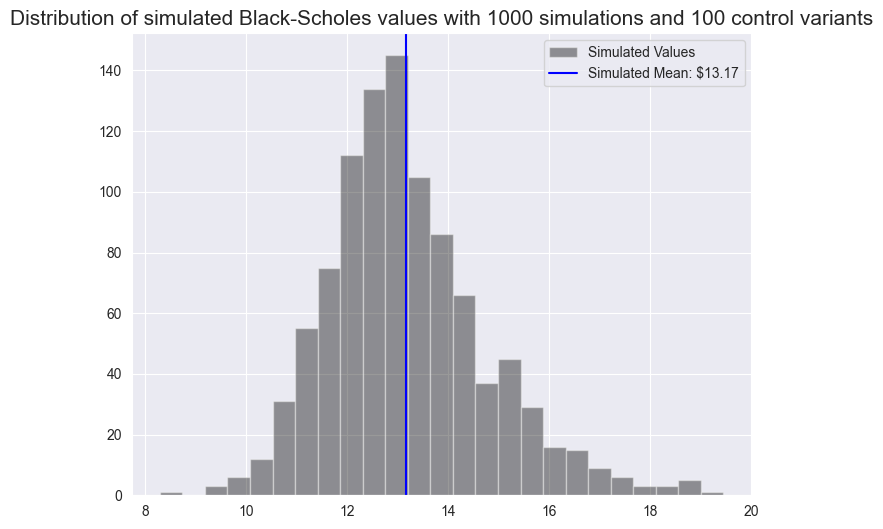

European Call Option Price (Monte Carlo, custom sigma, per contract): 13.17
Standard Error on Call Price (per contract): 0.0497


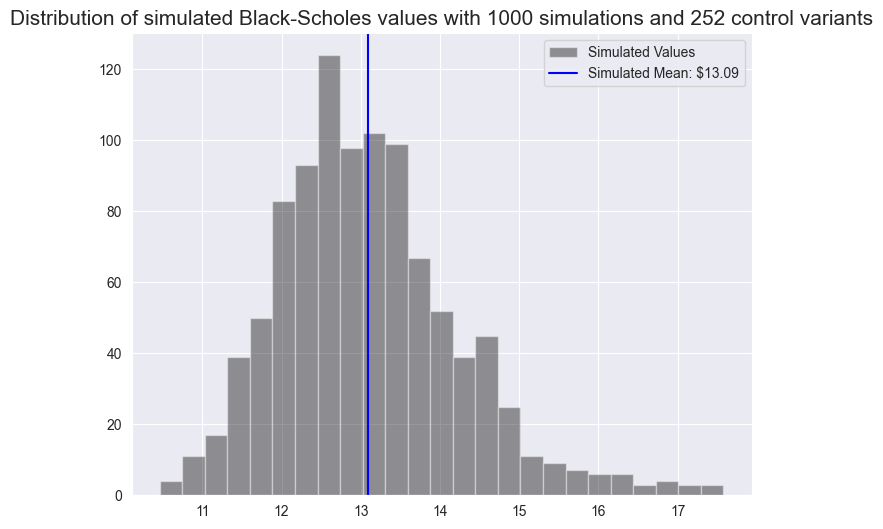

European Call Option Price (Monte Carlo, custom sigma, per contract): 13.09
Standard Error on Call Price (per contract): 0.0360


In [6]:
sigma = [.2, .3, .45]
sigma_probs = [.5, .3, .2]
n_paths = 1000
n_sims = n_paths
n_hedges = 15
delta_sims = 500

hedging_numbers = [1, 5, 25, 50, 100, 252]

for n_hedges in hedging_numbers:
    profits_hedged = MC_call_custom_sigma(S0, K, sigma, sigma_probs, t, r, mu, n_sims, n_hedges, delta_sims)
    
    
    plt.figure(figsize = (8,6))
    
    plt.hist(profits_hedged, bins = 25, alpha = 0.4, color = 'black', label = 'Simulated Values')
    
    plt.axvline(np.mean(profits_hedged), label = f'Simulated Mean: ${np.mean(profits_hedged):.2f}', color = 'blue')
    
    plt.legend()
    
    plt.title(f'Distribution of simulated Black-Scholes values with {n_sims} simulations and \
{n_hedges} control variants',size = 15)
    
    plt.show()
    print(f"European Call Option Price (Monte Carlo, custom sigma, per contract): {np.mean(profits_hedged):.2f}")
    print(f"Standard Error on Call Price (per contract): {np.std(profits_hedged)/ np.sqrt(n_paths):.4f}")

## Return distribution of sold call option

### Without delta hedging

In [7]:
n_contracts = 100  # Example: sell 100 call options

# Black-Scholes price with sigma=0.5
bs_sigma = 0.5
bs_premium = black_scholes_call(S0, K, t, r, bs_sigma)
total_bs_premium = n_contracts * bs_premium
print(f"Premium Collected (per contract as per Black-Scholes Price with sigma=0.5): {bs_premium:.4f}")
print(f"Total Premium Collected for {n_contracts} contracts: {total_bs_premium:.2f}")

Premium Collected (per contract as per Black-Scholes Price with sigma=0.5): 20.9615
Total Premium Collected for 100 contracts: 2096.15


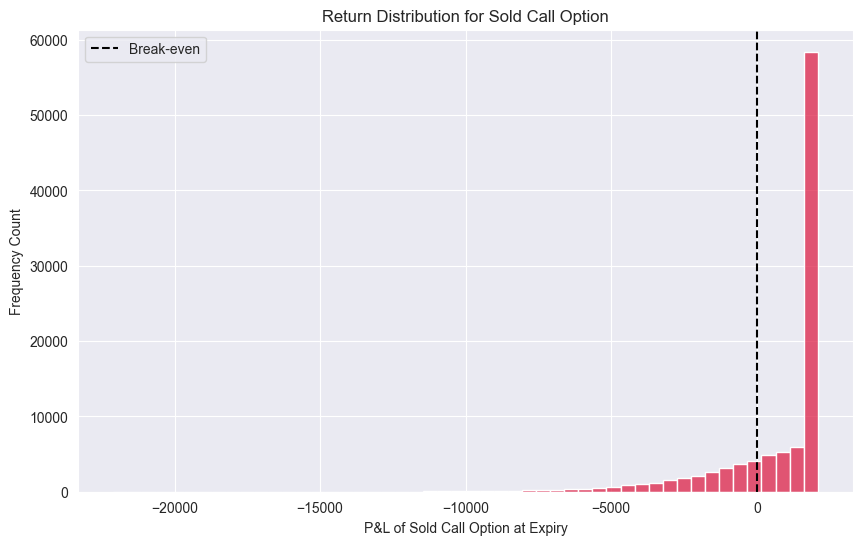

Expected Profits (sold 100 calls): 784.49
Max Loss (sold 100 calls): -22104.63
Max Profit (sold 100 calls): 2096.15


In [8]:
# Plot P&L distribution
pl_sold_call = n_contracts * (bs_premium - np.exp(-r * t) * payoffs)
# plot_sold_call_return_distribution(pl_sold_call, color='crimson', alpha=0.7)

plt.figure(figsize=(10,6))
sns.histplot(pl_sold_call, bins=50, kde=False, color='crimson', label=None, alpha=0.7)
plt.title('Return Distribution for Sold Call Option')
plt.xlabel('P&L of Sold Call Option at Expiry')
plt.ylabel('Frequency Count')
plt.axvline(x=0, color='black', linestyle='--', label='Break-even')
plt.legend()
plt.show()

print(f"Expected Profits (sold {n_contracts} calls): {np.mean(pl_sold_call):.2f}")
print(f"Max Loss (sold {n_contracts} calls): {np.min(pl_sold_call):.2f}")
print(f"Max Profit (sold {n_contracts} calls): {np.max(pl_sold_call):.2f}")

### With Delta Hedging

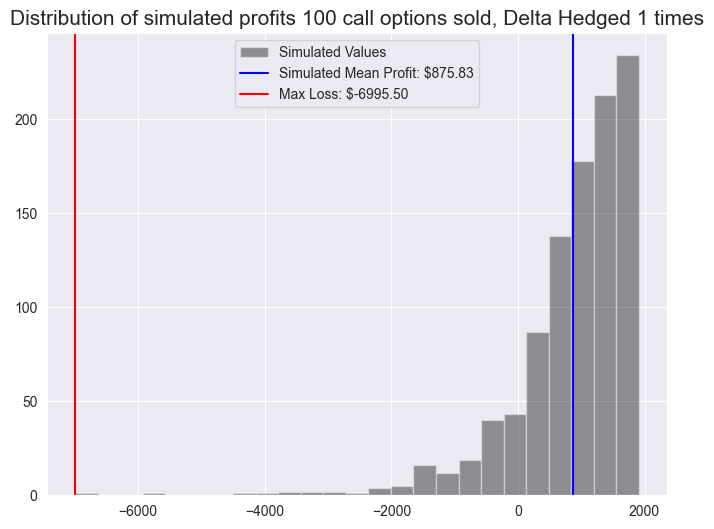

Expected Profits (sold 100 calls): 875.83 ± 29.92
Max Loss (sold 100 calls): -6995.50
Max Profit (sold 100 calls): 1910.55


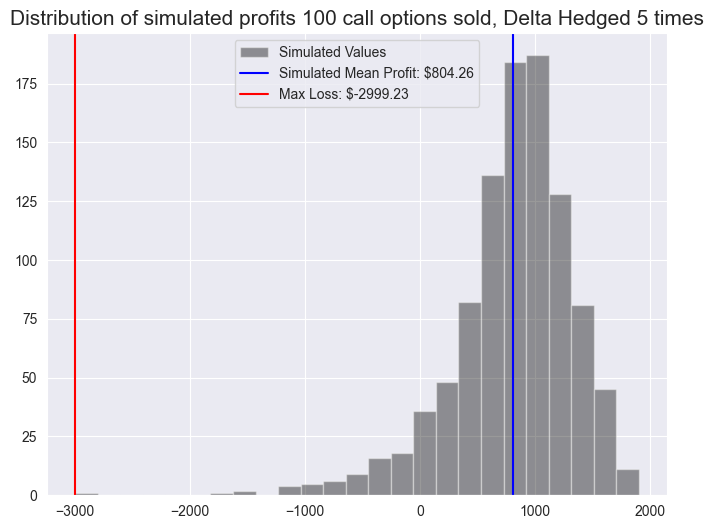

Expected Profits (sold 100 calls): 804.26 ± 16.76
Max Loss (sold 100 calls): -2999.23
Max Profit (sold 100 calls): 1902.30


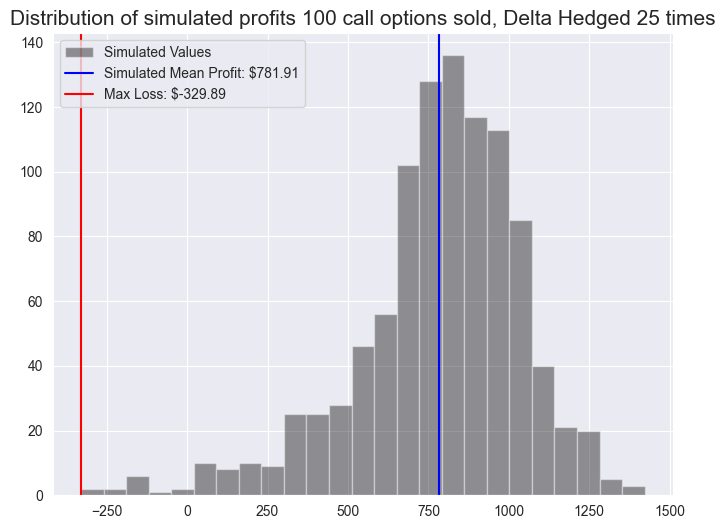

Expected Profits (sold 100 calls): 781.91 ± 8.26
Max Loss (sold 100 calls): -329.89
Max Profit (sold 100 calls): 1421.99


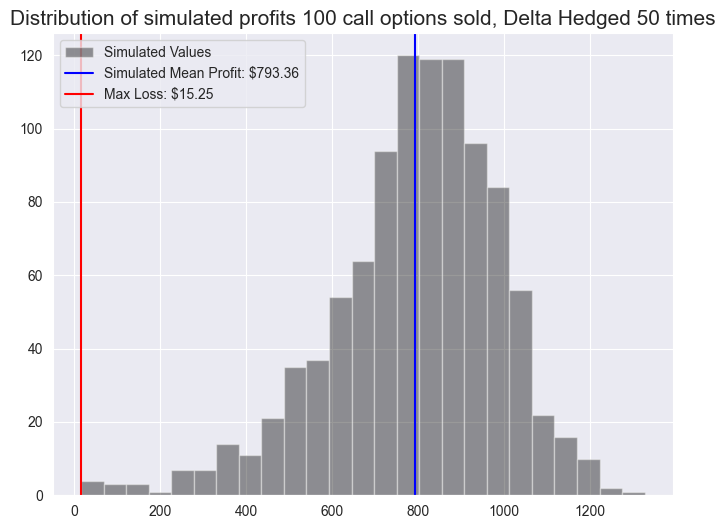

Expected Profits (sold 100 calls): 793.36 ± 6.24
Max Loss (sold 100 calls): 15.25
Max Profit (sold 100 calls): 1328.22


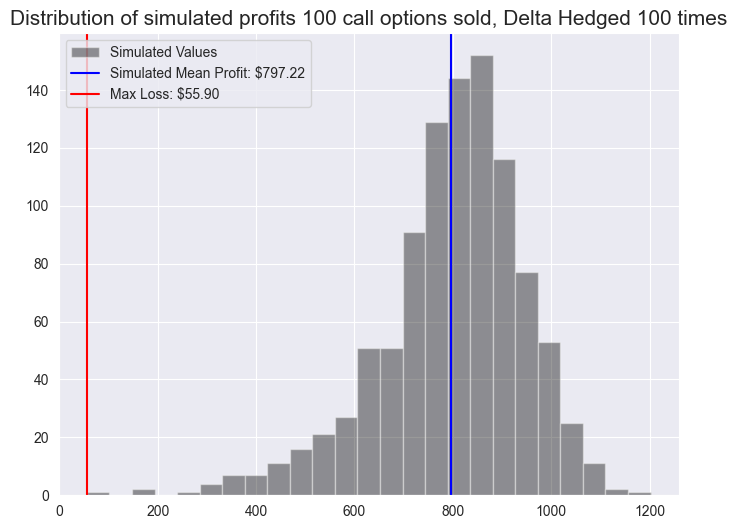

Expected Profits (sold 100 calls): 797.22 ± 4.68
Max Loss (sold 100 calls): 55.90
Max Profit (sold 100 calls): 1201.87


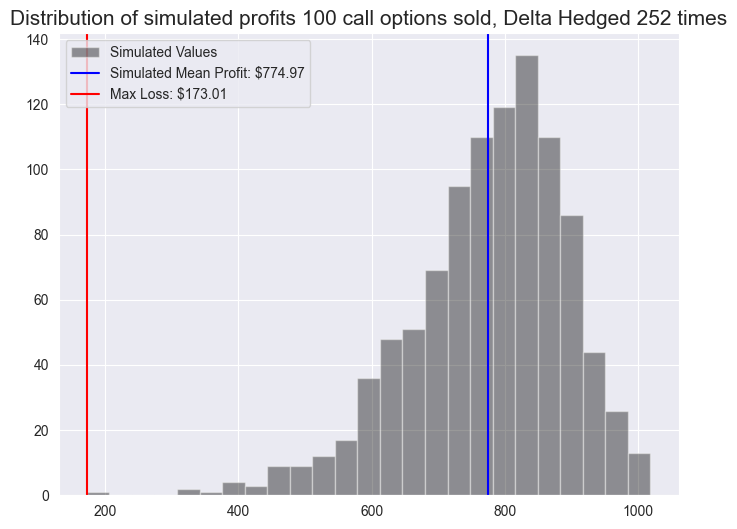

Expected Profits (sold 100 calls): 774.97 ± 3.71
Max Loss (sold 100 calls): 173.01
Max Profit (sold 100 calls): 1018.18


In [9]:
num_options = n_contracts
premium = bs_premium

for n_hedges in hedging_numbers:
    sold_calls_hedged = MC_call_custom_sigma(S0, K, sigma, sigma_probs, t, r, mu, n_sims, n_hedges, delta_sims)
    
    
    profits_hedged = num_options*(premium - sold_calls_hedged)
    
    
    plt.figure(figsize = (8,6))
    
    plt.hist(profits_hedged, bins = 25, alpha = .4, color = 'black', label = 'Simulated Values')
    
    # plt.axvline(num_options*(premium-bs_price), label = f'Black-Scholes Expected Profit: ${num_options*(premium-bs_price):.2f}', color = 'red')
    
    plt.axvline(np.mean(profits_hedged), label = f'Simulated Mean Profit: ${np.mean(profits_hedged):.2f}', color = 'blue')
    
    plt.axvline(np.min(profits_hedged), label = f'Max Loss: ${np.min(profits_hedged):.2f}', color = 'red')
    
    plt.legend()
    
    plt.title(f'Distribution of simulated profits {num_options} call options sold, Delta Hedged {n_hedges} times',size = 15)
    
    plt.show()

    print(f"Expected Profits (sold {n_contracts} calls): {np.mean(profits_hedged):.2f} ± {np.std(profits_hedged)/np.sqrt(len(profits_hedged)):.2f}")
    print(f"Max Loss (sold {n_contracts} calls): {np.min(profits_hedged):.2f}")
    print(f"Max Profit (sold {n_contracts} calls): {np.max(profits_hedged):.2f}")

# Options on stocks with GARCH(1,1) volatility dynamics

## Option Pricing

### Option pricing in GARCH without delta hedging

In [2]:
# Variables and model parameters
S0 = 100
K = 100
T = 1
r = 0.05
omega = 01
alpha = 0.1
beta = 0.88
n_simulations = 10000

In [3]:
# Price the option without delta hedging
option_price, option_price_std, payoff = price_call_option(S0, K, T, r, omega, alpha, beta, n_simulations)
print(f"European Call Option Price under GARCH(1,1) stock dynamics (without delta hedging): ${option_price:.2f} ± ${option_price_std:.4f}")

European Call Option Price under GARCH(1,1) stock dynamics (without delta hedging): $5.16 ± $0.0395


In [4]:
# Compute theoretical Black-Scholes price using average volatility from GARCH
n_steps = int(T * 252)
total_vol = 0
n_paths = 1000  # Use fewer paths for this calculation
for _ in range(n_paths):
    _, variances = simulate_garch_path(S0, T, r, omega, alpha, beta)
    avg_vol = np.sqrt(np.mean(variances))
    total_vol += avg_vol
avg_volatility = total_vol / n_paths
bs_price = black_scholes_price(S0, K, T, r, avg_volatility)
print(f"Average GARCH Volatility: {avg_volatility:.4f}")
print(f"Theoretical Black-Scholes Price with average GARCH volatility: ${bs_price:.2f}")

Average GARCH Volatility: 0.0398
Theoretical Black-Scholes Price with average GARCH volatility: $5.07


Se note that the two prices are not that far apart

### Option pricing in GARCH with Delta hedging

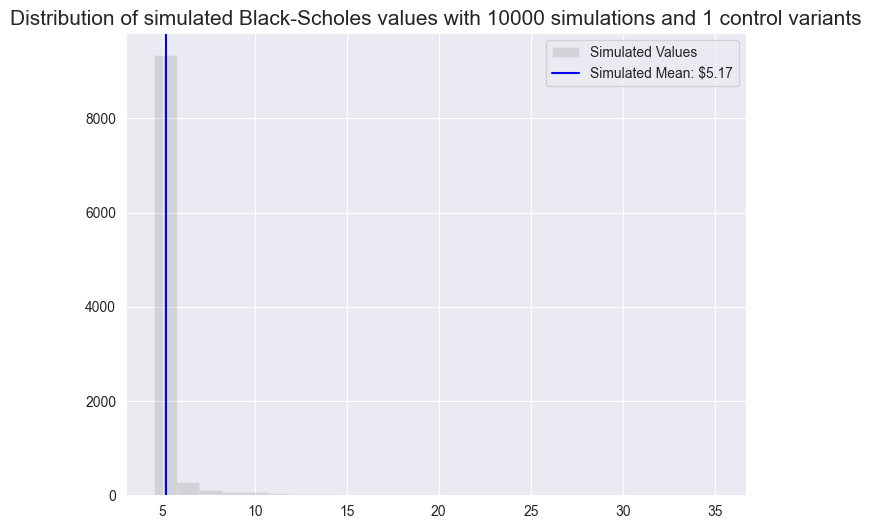

European Call Option Price (Monte Carlo, custom sigma, per contract): 5.17
Standard Error on Call Price (per contract): 0.0431


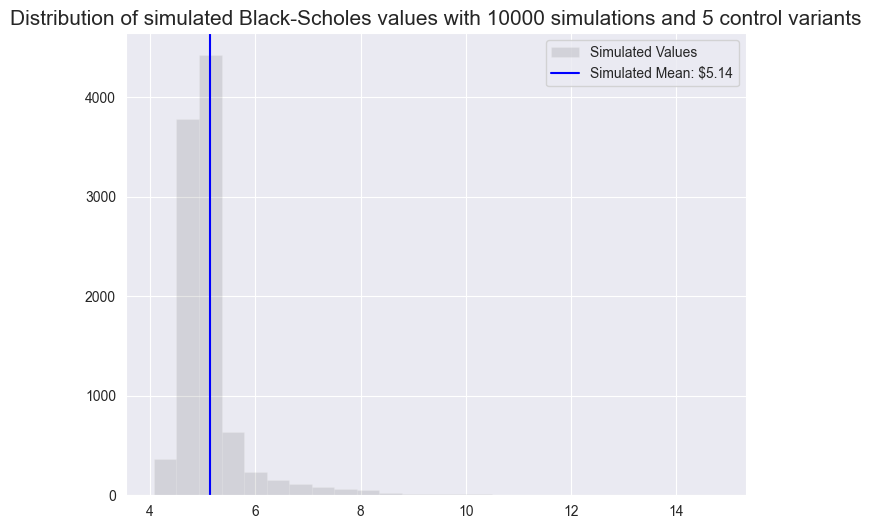

European Call Option Price (Monte Carlo, custom sigma, per contract): 5.14
Standard Error on Call Price (per contract): 0.0237


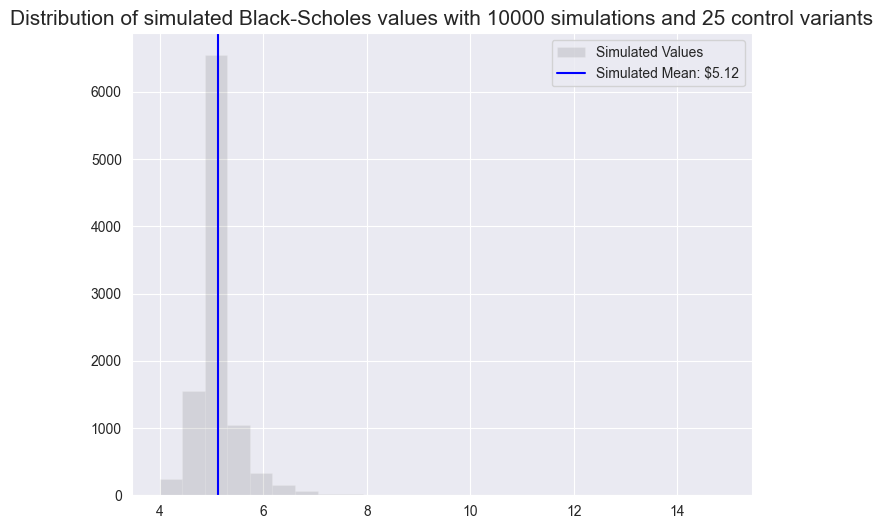

European Call Option Price (Monte Carlo, custom sigma, per contract): 5.12
Standard Error on Call Price (per contract): 0.0144


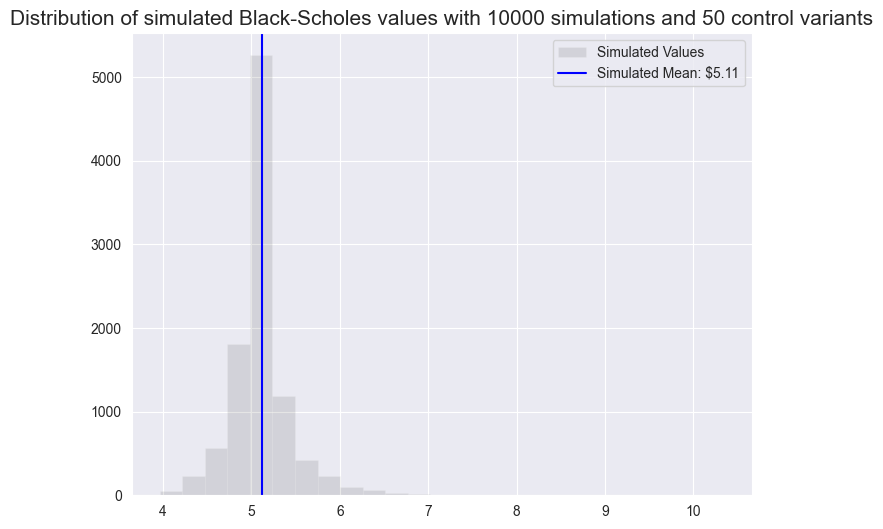

European Call Option Price (Monte Carlo, custom sigma, per contract): 5.11
Standard Error on Call Price (per contract): 0.0112


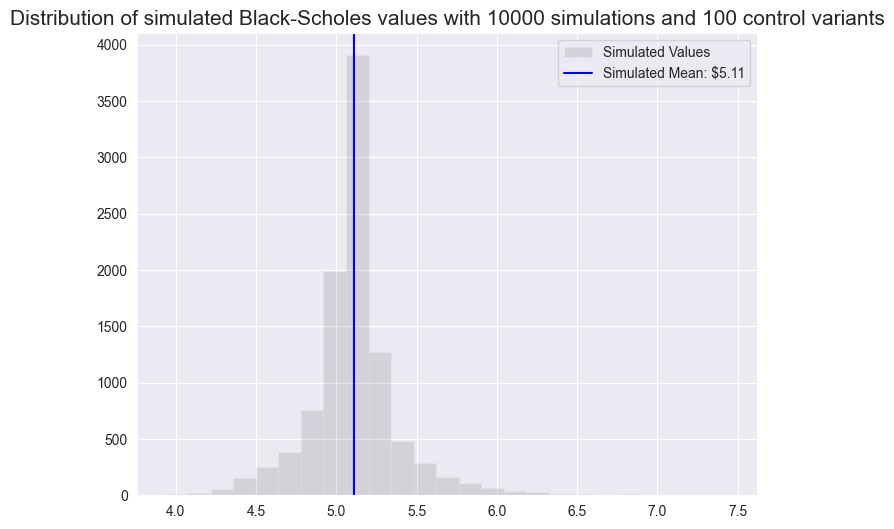

European Call Option Price (Monte Carlo, custom sigma, per contract): 5.11
Standard Error on Call Price (per contract): 0.0089


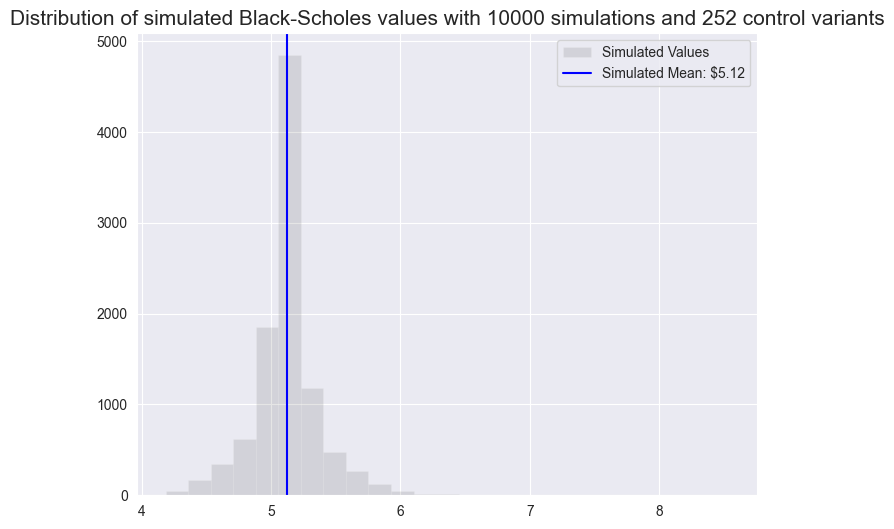

European Call Option Price (Monte Carlo, custom sigma, per contract): 5.12
Standard Error on Call Price (per contract): 0.0080


In [5]:
# Variables and model parameters
S0 = 100
K = 100
T = 1
r = 0.05
omega = 0
alpha = 0.1
beta = 0.88
n_simulations = 10000
delta_sims = 500
mu = 0

hedging_numbers = [1, 5, 25, 50, 100, 252]

for n_hedges in hedging_numbers:
    profits_hedged = MC_call_GARCH(S0, K, T, r, omega, alpha, beta, mu, n_simulations, n_hedges, delta_sims)
    
    
    plt.figure(figsize = (8,6))
    
    plt.hist(profits_hedged, bins = 25, alpha = 0.1, color = 'black', label = 'Simulated Values')
    
    plt.axvline(np.mean(profits_hedged), label = f'Simulated Mean: ${np.mean(profits_hedged):.2f}', color = 'blue')
    
    plt.legend()
    
    plt.title(f'Distribution of simulated Black-Scholes values with {n_simulations} simulations and \
{n_hedges} control variants',size = 15)
    
    plt.show()
    print(f"European Call Option Price (Monte Carlo, custom sigma, per contract): {np.mean(profits_hedged):.2f}")
    print(f"Standard Error on Call Price (per contract): {np.std(profits_hedged)/ np.sqrt(n_paths):.4f}")

## Return distribution of sold call option

### Without delta hedging

In [9]:
bs_premium

5.279199964846711

In [6]:
n_contracts = 100  # Example: sell 100 call options

# Black-Scholes price with sigma=0.5
bs_premium = black_scholes_price(S0, K, T, r, avg_volatility+0.01)
total_bs_premium = n_contracts * bs_premium
print(f"Premium Collected (per contract as per Black-Scholes Price with sigma=0.5): {bs_premium:.4f}")
print(f"Total Premium Collected for {n_contracts} contracts: {total_bs_premium:.2f}")

Premium Collected (per contract as per Black-Scholes Price with sigma=0.5): 5.2792
Total Premium Collected for 100 contracts: 527.92


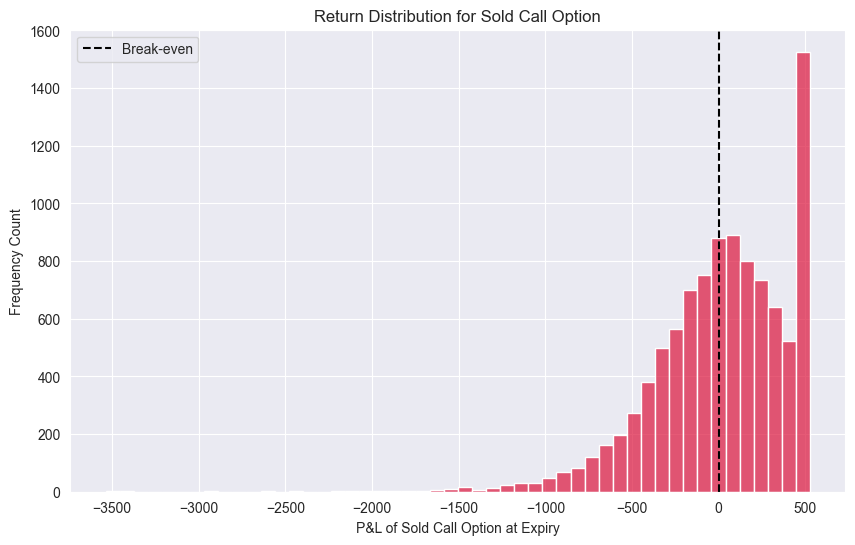

Expected Profits (sold 100 calls): 12.02
Max Loss (sold 100 calls): -3538.80
Max Profit (sold 100 calls): 527.92


In [7]:
# Plot P&L distribution
pl_sold_call = n_contracts * (bs_premium - np.exp(-r * T) * payoff)
# plot_sold_call_return_distribution(pl_sold_call, color='crimson', alpha=0.7)

plt.figure(figsize=(10,6))
sns.histplot(pl_sold_call, bins=50, kde=False, color='crimson', label=None, alpha=0.7)
plt.title('Return Distribution for Sold Call Option')
plt.xlabel('P&L of Sold Call Option at Expiry')
plt.ylabel('Frequency Count')
plt.axvline(x=0, color='black', linestyle='--', label='Break-even')
plt.legend()
plt.show()

print(f"Expected Profits (sold {n_contracts} calls): {np.mean(pl_sold_call):.2f}")
print(f"Max Loss (sold {n_contracts} calls): {np.min(pl_sold_call):.2f}")
print(f"Max Profit (sold {n_contracts} calls): {np.max(pl_sold_call):.2f}")

### With Delta Hedging

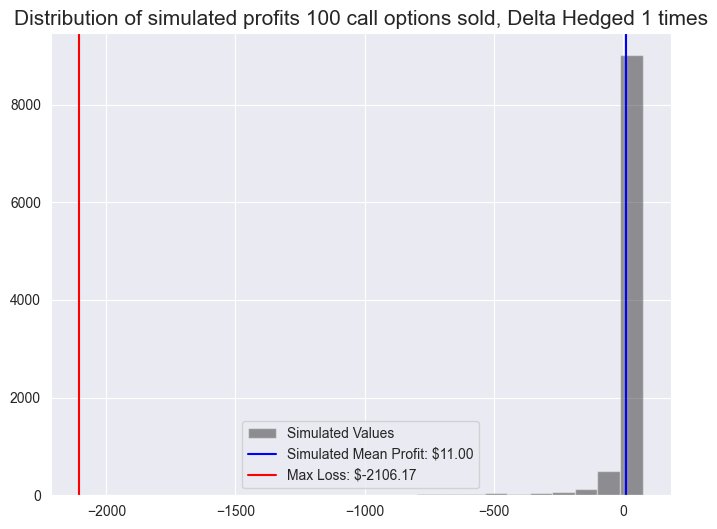

Expected Profits (sold 100 calls): 11.00 ± 1.33
Max Loss (sold 100 calls): -2106.17
Max Profit (sold 100 calls): 75.75


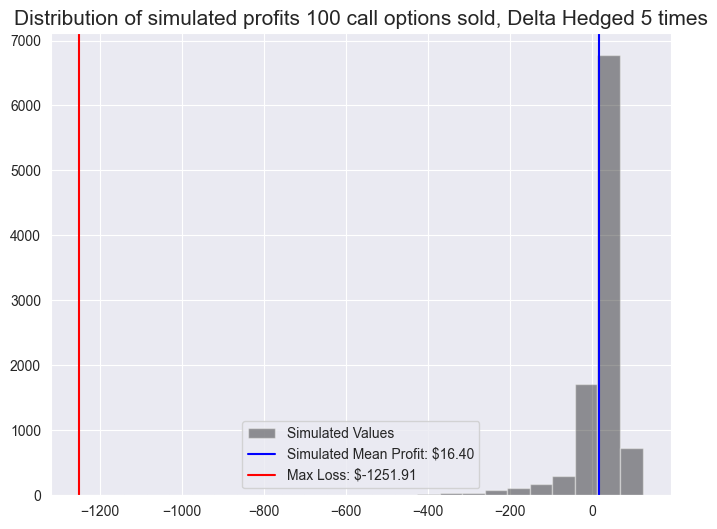

Expected Profits (sold 100 calls): 16.40 ± 0.71
Max Loss (sold 100 calls): -1251.91
Max Profit (sold 100 calls): 122.26


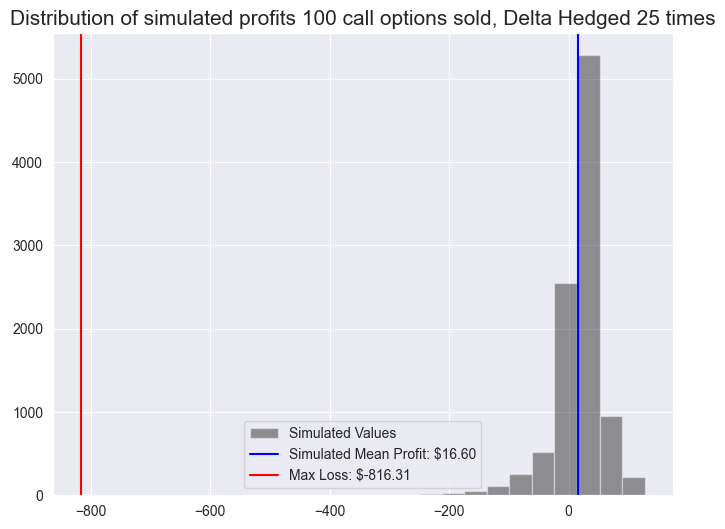

Expected Profits (sold 100 calls): 16.60 ± 0.43
Max Loss (sold 100 calls): -816.31
Max Profit (sold 100 calls): 127.42


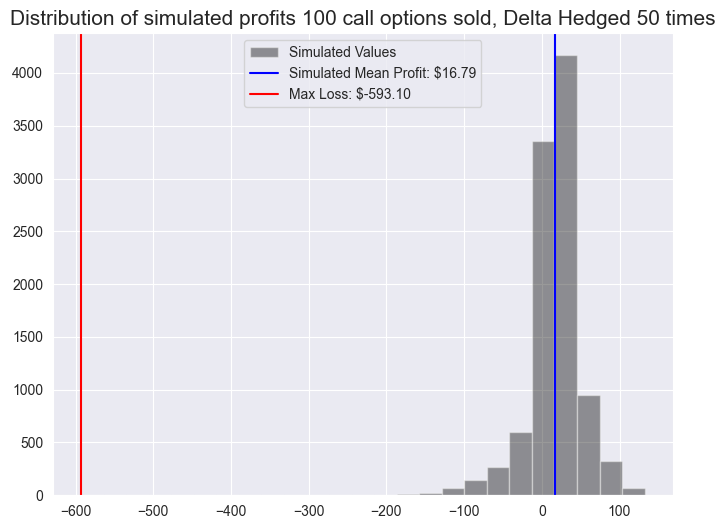

Expected Profits (sold 100 calls): 16.79 ± 0.35
Max Loss (sold 100 calls): -593.10
Max Profit (sold 100 calls): 132.33


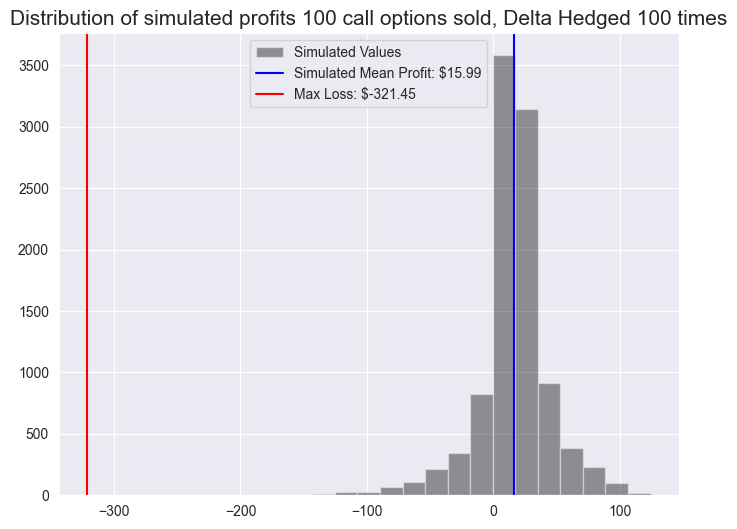

Expected Profits (sold 100 calls): 15.99 ± 0.29
Max Loss (sold 100 calls): -321.45
Max Profit (sold 100 calls): 124.15


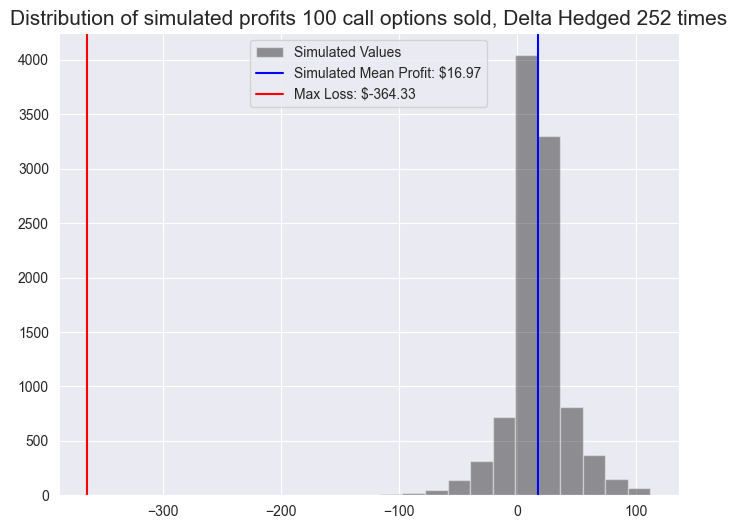

Expected Profits (sold 100 calls): 16.97 ± 0.25
Max Loss (sold 100 calls): -364.33
Max Profit (sold 100 calls): 112.47


In [8]:
premium = bs_premium
num_options = n_contracts

for n_hedges in hedging_numbers:
    
    sold_calls_hedged = MC_call_GARCH(S0, K, T, r, omega, alpha, beta, mu, n_simulations, n_hedges, delta_sims)
    
    profits_hedged = num_options*(premium - sold_calls_hedged)
    
    
    plt.figure(figsize = (8,6))
    
    plt.hist(profits_hedged, bins = 25, alpha = .4, color = 'black', label = 'Simulated Values')
    
    # plt.axvline(num_options*(premium-bs_price), label = f'Black-Scholes Expected Profit: ${num_options*(premium-bs_price):.2f}', color = 'red')
    
    plt.axvline(np.mean(profits_hedged), label = f'Simulated Mean Profit: ${np.mean(profits_hedged):.2f}', color = 'blue')
    
    plt.axvline(np.min(profits_hedged), label = f'Max Loss: ${np.min(profits_hedged):.2f}', color = 'red')
    
    plt.legend()
    
    plt.title(f'Distribution of simulated profits {num_options} call options sold, Delta Hedged \
{n_hedges} times',size = 15)
    
    plt.show()

    print(f"Expected Profits (sold {n_contracts} calls): {np.mean(profits_hedged):.2f} ± {np.std(profits_hedged)/np.sqrt(len(profits_hedged)):.2f}")
    print(f"Max Loss (sold {n_contracts} calls): {np.min(profits_hedged):.2f}")
    print(f"Max Profit (sold {n_contracts} calls): {np.max(profits_hedged):.2f}")

# Codebase

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import norm

def stock_path_custom_sigma(S0, t, r, mu, n_paths, n_steps):
    '''
    Generation of custom stock paths following Geometeric Brownian motion,
    but log-returns do not have constant volatility.
    
    Each step of the log-returns, there is a 
    1) 50% the volatility is .2
    2) 30% chance the volatility is .3
    3) 20% chance the volatility is .45
    
    Inputs:
    S0 (float): initial stock value
    t (float): time interval of stock path movements in years
    r (float): risk-free interest rate
    mu (float): drift of log-returns
    n_paths (int): number of stock paths
    n_steps (float): number of steps in each stock path
    
    Returns:
    
    Simuatled stock paths
    '''
    
    #Noise in volatility
    noise = np.random.normal(0,1,size = (n_paths, n_steps))
    
    #Custom sigma that is not constant
    sigma = np.random.choice([.2,.3,.45], p = [.5, .3, .2], size = (n_paths, n_steps))
    
    #Time increment between each step
    dt = t/n_steps
    
    #log-returns between each step
    increments = (mu + r - .5*sigma**2)*dt + sigma*np.sqrt(dt)*noise
    
    #Cumulative log-returns at each step
    log_returns = np.cumsum(increments, axis = 1)
    
    
    #paths
    paths = S0*np.exp(log_returns)
    
    
    #Adjoint initial value S0 at start of each simulated path
    paths = np.insert(paths, 0, S0, axis = 1)
    
    
    return paths

def MC_call_delta_custom(S0, K, sigma,sigma_probs, t, r, delta_sims = int(250)):
    """Description: 
    Monte-Carlo Simulation of Custom Stock Call Delta
    
    Parameters:
    S0 (float): spot price
    K (float): strike price
    sigma (array): array of volatilities
    sigma_probs (array): probabilities of sigmas
    t (float): time to expiration
    r (float): risk-free interest rate
    delta_sims (int): Number of simulations
    
    Return
    float: simulated delta of call option
    
    """
    bump = .01*S0

    noise = np.random.normal(0,1,delta_sims)
    
    sampled_sigma = np.random.choice(sigma,p=sigma_probs,size=delta_sims)

    log_returns = (r - .5*sampled_sigma**2)*t + sampled_sigma*np.sqrt(t)*noise

    paths_up = (S0+bump)*np.exp(log_returns)
    paths_down = (S0-bump)*np.exp(log_returns)

    call_up = np.maximum(paths_up - K, 0)*np.exp(-r*t)
    call_down = np.maximum(paths_down - K, 0)*np.exp(-r*t)

    simulated_deltas = (call_up-call_down)/(2*bump)

    return np.mean(simulated_deltas)
    
def MC_call_delta_custom_array(S, K, sigma, sigma_probs, t, r, delta_sims=250):
    """
    Monte Carlo estimation of Custom Stock call deltas for an array of spot prices
    
    Parameters:
    S (np.array): array of spot prices
    K (float): strike price
    sigma (array): array of volatilities
    sigma_probs (array): probabilities of sigmas
    t (float): time to expiration
    r (float): risk-free interest rate
    delta_sims (int): Number of simulations
    
    Return
    float: simulated delta of call option
    """
    bump = 0.01 * S
    noise = np.random.normal(0, 1, (delta_sims, len(S)))

    sampled_sigma = np.random.choice(sigma, p=sigma_probs, size=(delta_sims, len(S)))
    log_returns = (r - 0.5 * sampled_sigma**2) * t + sampled_sigma * np.sqrt(t) * noise

    paths_up = (S + bump) * np.exp(log_returns)
    paths_down = (S - bump) * np.exp(log_returns)

    call_up = np.maximum(paths_up - K, 0) * np.exp(-r * t)
    call_down = np.maximum(paths_down - K, 0) * np.exp(-r * t)

    deltas = (call_up - call_down) / (2 * bump)
    return np.mean(deltas, axis=0)

def MC_call_custom_sigma(S0, K, sigma, sigma_probs, t, r, mu = 0, n_sims = 2500, n_hedges = 50, delta_sims = 250):
    
    """Description
    Monte-Carlo simulation of the value of a call option based on custom stock with Delta based control variants
    
    
    Parameters:
    S0 (float): spot price
    K (float): strike price
    sigma (array): array of volatilities
    sigma_probs (array): probabilities of sigmas
    r (float): risk-free interest rate
    t (float): time to expiration
    mu (float): Drift of log-returns
    n_sims (int): Number of simulations
    n_hedges (int): number of delta control variants at evenly spaced increments
    
    
    Return:
    np.array of simulated values of Black-Scholes value of call option
    """
    
    #Create random noise for n_sims number of paths with n_hedges steps in simulated stock movements
    noise = np.random.normal(0,1, (n_sims,n_hedges))

    dt = t/n_hedges #time interval between each step in simulated path
    sampled_sigma = np.random.choice(sigma, p = sigma_probs,size = (n_sims,n_hedges))


    exponent = (mu + r - .5*sampled_sigma**2)*dt + sampled_sigma*np.sqrt(dt)*noise

    log_returns = np.cumsum(exponent, axis = 1)

    paths = S0*np.exp(log_returns)


    #Simulate call payoffs discounted to time 0

    path_ends = paths[:,-1] 

    call_payoffs = np.maximum(path_ends - K, 0)*np.exp(-r*t)


    #Simulate stock profits at each interval

    ## profit from start to first step discounted to time 0

    paths_first_step = paths[:,0]

    delta_start = MC_call_delta_custom(S0,K,sigma,sigma_probs,t,r,delta_sims)

    stock_profits_start = (paths_first_step - np.exp(r*dt)*S0)*delta_start*np.exp(-r*dt)

    total_stock_profits = []

    total_stock_profits.append(stock_profits_start)

    ## stock profits in intermediate steps
    for i in range(1,n_hedges):
        path_starts = paths[:,i-1]
        path_ends = paths[:,i]
    #time to expiration from starting point 
    #needed to find delta of option and how much stock should be held to be delta neutral until next step
        tte = t - i*dt 
        deltas = MC_call_delta_custom_array(path_starts, K, sigma,sigma_probs, tte, r,delta_sims)
        stock_profit = (path_ends - path_starts*np.exp(r*dt))*deltas*np.exp(-r*(i+1)*dt)
        total_stock_profits.append(stock_profit)

    stock_profits = np.sum(total_stock_profits, axis = 0)
    
    profits_hedged = call_payoffs - stock_profits
    
    return profits_hedged

# Function for BS call price
def black_scholes_call(S, K, T, r, sigma):
    from scipy.stats import norm
    if T < 1e-6:
        return max(0, S - K)
    sigma = max(sigma, 1e-6)
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

def simulate_garch_path(S0, T, r, omega, alpha, beta):
    """Simulate a single GARCH(1,1) path"""
    n_steps = int(T * 252)  # Assuming 252 trading days per year
    dt = T / n_steps
    
    # Initialize arrays
    returns = np.zeros(n_steps + 1)
    variance = np.zeros(n_steps + 1)
    prices = np.zeros(n_steps + 1)
    prices[0] = S0
    
    # Initial variance (unconditional variance)
    if (alpha + beta) < 1 and omega > 0:
        variance[0] = omega / (1 - alpha - beta)
    else:
        variance[0] = 0.01  # fallback initial variance
    
    # Simulate the path
    for t in range(1, n_steps + 1):
        z = np.random.normal(0, 1)
        variance[t] = omega + alpha * returns[t-1]**2 + beta * variance[t-1]
        returns[t] = np.sqrt(variance[t]) * z
        prices[t] = prices[t-1] * np.exp((r - 0.5 * variance[t]) * dt + np.sqrt(variance[t]) * np.sqrt(dt) * z)
    
    return prices, variance

def simulate_garch_paths(S0, T, r, omega, alpha, beta, n_paths):
    """
    Vectorized simulation of multiple GARCH(1,1) paths
    Returns arrays of prices and variances for all paths
    """
    n_steps = int(T * 252)
    dt = T / n_steps
    
    # Initialize arrays for all paths
    prices = np.zeros((n_paths, n_steps + 1))
    variances = np.zeros((n_paths, n_steps + 1))
    returns = np.zeros((n_paths, n_steps + 1))
    
    # Set initial values
    prices[:, 0] = S0
    if (alpha + beta) < 1 and omega > 0:
        variances[:, 0] = omega / (1 - alpha - beta)
    else:
        variances[:, 0] = 0.01
    
    # Generate all random numbers at once
    z = np.random.normal(0, 1, (n_paths, n_steps+1))
    
    # Simulate all paths
    for t in range(1, n_steps + 1):        
        # Update variance using GARCH(1,1)
        variances[:, t] = omega + alpha * returns[:, t-1]**2 + beta * variances[:, t-1]

        # Calculate returns
        returns[:, t] = np.sqrt(variances[:, t]) * z[:, t]
        
        # Update price
        prices[:, t] = prices[:, t-1] * np.exp((r - 0.5 * variances[:, t]) * dt + np.sqrt(variances[:, t]) * np.sqrt(dt) * z[:, t-1])
    
    return prices, variances

def plot_simulation_paths(S0, T, r, omega, alpha, beta, n_paths=5):
    """Plot sample simulation paths"""
    plt.figure(figsize=(10, 6))
    for _ in range(n_paths):
        path, _ = simulate_garch_path(S0, T, r, omega, alpha, beta)
        plt.plot(np.linspace(0, T, len(path)), path)
    
    plt.title('Sample GARCH(1,1) Price Paths')
    plt.xlabel('Time (years)')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.show()

def get_empirical_volatility_distribution(S0, T, r, omega, alpha, beta, n_paths):
    """
    Get empirical distribution of volatility from GARCH(1,1) simulations
    
    Parameters:
    -----------
    S0, T, r, omega, alpha, beta : GARCH parameters
    n_paths : int
        Number of paths to simulate
        
    Returns:
    --------
    numpy.ndarray : Array of volatilities for random sampling
    """
    # Simulate paths
    prices, variances = simulate_garch_paths(S0, T, r, omega, alpha, beta, n_paths)
    
    # Extract all volatilities (sqrt of variances)
    volatilities = np.sqrt(variances.flatten())
    
    return volatilities

def price_call_option(S0, K, T, r, omega, alpha, beta, n_simulations):
    """Price a European call option using vectorized Monte Carlo simulation"""
    prices, _ = simulate_garch_paths(S0, T, r, omega, alpha, beta, n_simulations)
    final_prices = prices[:, -1]
    payoffs = np.maximum(0, final_prices - K)
    option_price = np.exp(-r * T) * np.mean(payoffs)
    
    option_price_std = np.exp(-r * T) * np.std(payoffs) / np.sqrt(n_simulations)
    
    return option_price, option_price_std, payoffs

def black_scholes_price(S, K, T, r, sigma):
    """
    Compute the theoretical Black-Scholes price for a European call option.
    """
    if T <= 0 or sigma <= 0:
        return max(0, S - K)
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def MC_call_delta_GARCH(S0, K, t, r, omega, alpha, beta, delta_sims = int(250)):
    """Description: 
    Monte-Carlo Simulation of GARCH-based Call option Delta
    
    Parameters:
    S0 (float): spot price
    K (float): strike price
    sigma (array): array of volatilities
    sigma_probs (array): probabilities of sigmas
    t (float): time to expiration
    r (float): risk-free interest rate
    delta_sims (int): Number of simulations
    
    Return
    float: simulated delta of call option
    
    """
    bump = .01*S0

    noise = np.random.normal(0,1,delta_sims)
    
    # Get the empirical volatility distribution from the model
    volatilities = get_empirical_volatility_distribution(S0, t, r, omega, alpha, beta, n_paths=10000)
    
    # # Sample multiple volatilities
    # sample_size = 1000
    # sampled_volatilities = np.random.choice(volatilities, size=sample_size)
    
    # Sample with replacement (default)
    sampled_sigma = np.random.choice(volatilities, size=delta_sims)
    
    # sampled_sigma = np.random.choice(sigma,p=sigma_probs,size=delta_sims)

    log_returns = (r - .5*sampled_sigma**2)*t + sampled_sigma*np.sqrt(t)*noise

    paths_up = (S0+bump)*np.exp(log_returns)
    paths_down = (S0-bump)*np.exp(log_returns)

    call_up = np.maximum(paths_up - K, 0)*np.exp(-r*t)
    call_down = np.maximum(paths_down - K, 0)*np.exp(-r*t)

    simulated_deltas = (call_up-call_down)/(2*bump)

    return np.mean(simulated_deltas)
    
def MC_call_delta_GARCH_array(S, K, t, r, omega, alpha, beta, delta_sims=250):
    """
    Monte Carlo estimation of GARCH-based Call Option deltas for an array of spot prices
    
    Parameters:
    S (np.array): array of spot prices
    K (float): strike price
    sigma (array): array of volatilities
    sigma_probs (array): probabilities of sigmas
    t (float): time to expiration
    r (float): risk-free interest rate
    delta_sims (int): Number of simulations
    
    Return
    float: simulated delta of call option
    """
    bump = 0.01 * S
    noise = np.random.normal(0, 1, (delta_sims, len(S)))

    # Get the empirical volatility distribution from the model
    volatilities = get_empirical_volatility_distribution(0.5, t, r, omega, alpha, beta, n_paths=10000)
    
    # # Sample multiple volatilities
    # sample_size = 1000
    # sampled_volatilities = np.random.choice(volatilities, size=sample_size)
    
    # Sample with replacement (default)
    sampled_sigma = np.random.choice(volatilities, size=(delta_sims, len(S)))

    # sampled_sigma = np.random.choice(sigma, p=sigma_probs, size=(delta_sims, len(S)))
    log_returns = (r - 0.5 * sampled_sigma**2) * t + sampled_sigma * np.sqrt(t) * noise

    paths_up = (S + bump) * np.exp(log_returns)
    paths_down = (S - bump) * np.exp(log_returns)

    call_up = np.maximum(paths_up - K, 0) * np.exp(-r * t)
    call_down = np.maximum(paths_down - K, 0) * np.exp(-r * t)

    deltas = (call_up - call_down) / (2 * bump)
    return np.mean(deltas, axis=0)

def MC_call_GARCH(S0, K, t, r, omega, alpha, beta, mu = 0, n_sims = 2500, n_hedges = 50, delta_sims = 250):
    
    """Description
    Monte-Carlo simulation of the value of a call option on a stock following GARCH(1,1) dynamics with Delta based control variants
    
    
    Parameters:
    S0 (float): spot price
    K (float): strike price
    sigma (array): array of volatilities
    sigma_probs (array): probabilities of sigmas
    r (float): risk-free interest rate
    t (float): time to expiration
    mu (float): Drift of log-returns
    n_sims (int): Number of simulations
    n_hedges (int): number of delta control variants at evenly spaced increments
    
    
    Return:
    np.array of simulated values of Black-Scholes value of call option
    """
    
    #Create random noise for n_sims number of paths with n_hedges steps in simulated stock movements
    noise = np.random.normal(0,1, (n_sims,n_hedges))

    dt = t/n_hedges #time interval between each step in simulated path

    volatilities = get_empirical_volatility_distribution(S0, t, r, omega, alpha, beta, n_paths=10000)
    sampled_sigma = np.random.choice(volatilities, size = (n_sims,n_hedges))


    exponent = (mu + r - .5*sampled_sigma**2)*dt + sampled_sigma*np.sqrt(dt)*noise

    log_returns = np.cumsum(exponent, axis = 1)

    paths = S0*np.exp(log_returns)


    #Simulate call payoffs discounted to time 0

    path_ends = paths[:,-1] 

    call_payoffs = np.maximum(path_ends - K, 0)*np.exp(-r*t)


    #Simulate stock profits at each interval

    ## profit from start to first step discounted to time 0

    paths_first_step = paths[:,0]

    delta_start = MC_call_delta_GARCH(S0, K, t, r, omega, alpha, beta, delta_sims)

    stock_profits_start = (paths_first_step - np.exp(r*dt)*S0)*delta_start*np.exp(-r*dt)

    total_stock_profits = []

    total_stock_profits.append(stock_profits_start)

    ## stock profits in intermediate steps
    for i in range(1,n_hedges):
        path_starts = paths[:,i-1]
        path_ends = paths[:,i]
    #time to expiration from starting point 
    #needed to find delta of option and how much stock should be held to be delta neutral until next step
        tte = t - i*dt 
        deltas = MC_call_delta_GARCH_array(path_starts, K, tte, r, omega, alpha, beta, delta_sims)
        stock_profit = (path_ends - path_starts*np.exp(r*dt))*deltas*np.exp(-r*(i+1)*dt)
        total_stock_profits.append(stock_profit)

    stock_profits = np.sum(total_stock_profits, axis = 0)
    
    profits_hedged = call_payoffs - stock_profits
    
    return profits_hedged